### V2

COBA GITHUB LINK

In [1]:
!git clone https://github.com/shafidaaaa/Bangkit.git

Cloning into 'Bangkit'...
remote: Enumerating objects: 1685, done.
remote: Counting objects: 100% (1152/1152), done.
remote: Compressing objects: 100% (922/922), done.
remote: Total 1685 (delta 214), reused 1028 (delta 203), pack-reused 533
Receiving objects: 100% (1685/1685), 442.22 MiB | 18.66 MiB/s, done.
Resolving deltas: 100% (291/291), done.
Updating files: 100% (1136/1136), done.


In [15]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import zipfile
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from google.colab import files

In [3]:
# Define the path to the images directory
image_directory1 = '/content/Bangkit/Capstone/bisindo_data/Citra BISINDO'
image_directory2 = '/content/Bangkit/Capstone/bisindo_data/bisindo_dataset_v2'


using VGG


In [4]:

# Load images and labels from a given directory
def load_images_and_labels(image_directory, image_size=(256, 256)):
    images = []
    labels = []
    for label in os.listdir(image_directory):
        label_path = os.path.join(image_directory, label)
        if os.path.isdir(label_path):
            for image_name in os.listdir(label_path):
                image_path = os.path.join(label_path, image_name)
                image = tf.keras.preprocessing.image.load_img(image_path, target_size=image_size)
                image = tf.keras.preprocessing.image.img_to_array(image)
                images.append(image)
                labels.append(label)
    return np.array(images), np.array(labels)

# Load images and labels from both directories
X1, y1 = load_images_and_labels(image_directory1)
X2, y2 = load_images_and_labels(image_directory2)

# Combine the data from both directories
X = np.concatenate((X1, X2), axis=0)
y = np.concatenate((y1, y2), axis=0)
# Normalize the images
X = X / 255.0

# Encode labels as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert labels to categorical (one-hot encoding)
y_categorical = tf.keras.utils.to_categorical(y_encoded)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Load VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Create a new model that outputs the features from the last convolutional block
model = tf.keras.Model(inputs=base_model.input, outputs=base_model.get_layer('block5_conv3').output)

# Preprocess the images for VGG16
X_train_preprocessed = preprocess_input(X_train * 255)
X_test_preprocessed = preprocess_input(X_test * 255)

# Extract features
features_train = model.predict(X_train_preprocessed)
features_test = model.predict(X_test_preprocessed)

# Flatten the features
features_train = features_train.reshape(features_train.shape[0], -1)
features_test = features_test.reshape(features_test.shape[0], -1)

# Display the shape of the extracted features
print(f"Train features shape: {features_train.shape}")
print(f"Test features shape: {features_test.shape}")


5/5 [==============================] - 113s 22s/step
Train features shape: (561, 131072)
Test features shape: (141, 131072)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the classifier model
classifier = Sequential([
    Dense(512, activation='relu', input_shape=(features_train.shape[1],)),
    Dropout(0.5),
    # Dense(256, activation='relu'),
    # Dropout(0.5),
    Dense(26, activation='softmax')
])

# Compile the model
classifier.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Train the model
history = classifier.fit(features_train, y_train,
                         epochs=15,
                         validation_data=(features_test, y_test))

# Evaluate the model
test_loss, test_acc = classifier.evaluate(features_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

Epoch 1/15
18/18 [==============================] - 27s 1s/step - loss: 36.0028 - accuracy: 0.4884 - val_loss: 5.8020 - val_accuracy: 0.7801
Epoch 2/15
18/18 [==============================] - 26s 1s/step - loss: 5.4070 - accuracy: 0.8788 - val_loss: 2.1510 - val_accuracy: 0.8865
Epoch 3/15
18/18 [==============================] - 24s 1s/step - loss: 2.5222 - accuracy: 0.9127 - val_loss: 1.6595 - val_accuracy: 0.8865
Epoch 4/15
18/18 [==============================] - 25s 1s/step - loss: 1.7904 - accuracy: 0.9465 - val_loss: 2.0203 - val_accuracy: 0.9220
Epoch 5/15
18/18 [==============================] - 26s 1s/step - loss: 0.9706 - accuracy: 0.9519 - val_loss: 2.3770 - val_accuracy: 0.9078
Epoch 6/15
18/18 [==============================] - 25s 1s/step - loss: 1.1819 - accuracy: 0.9608 - val_loss: 1.6274 - val_accuracy: 0.9291
Epoch 7/15
18/18 [==============================] - 24s 1s/step - loss: 0.5169 - accuracy: 0.9715 - val_loss: 2.0633 - val_accuracy: 0.9220
Epoch 8/15
18/18 [=

In [24]:
X_test_normalized = X_test * 255.0
# Make predictions
predictions = classifier.predict(features_test)

# Get the predicted classes
predicted_classes = np.argmax(predictions, axis=1)
predicted_class = label_encoder.inverse_transform(predicted_classes)

# Get the true classes
true_classes = np.argmax(y_test, axis=1)
true_class = label_encoder.inverse_transform(true_classes)

# Print some predictions and their corresponding true classes
print("Predicted classes:", predicted_class[:10])
print("True classes:", true_class[:10])

5/5 [==============================] - 1s 111ms/step
Predicted classes: ['J' 'D' 'L' 'P' 'Z' 'W' 'Q' 'O' 'P' 'K']
True classes: ['J' 'D' 'L' 'P' 'Z' 'W' 'Q' 'O' 'P' 'K']


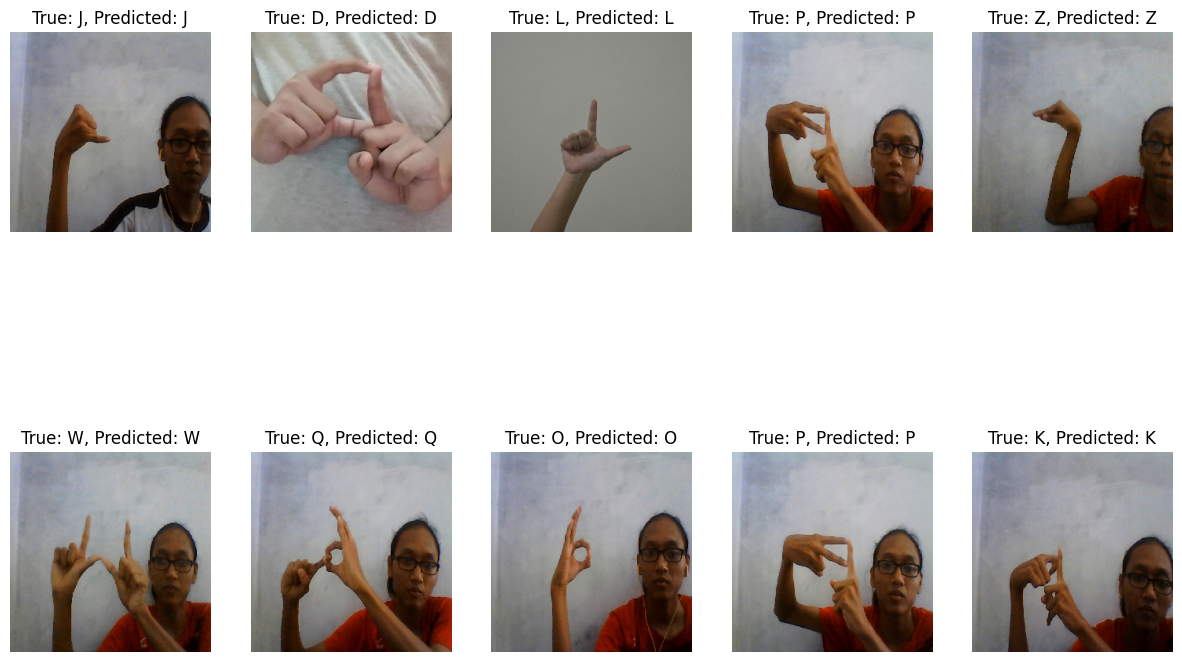

In [25]:
def plot_images(images, true_labels, predicted_labels):
    plt.figure(figsize=(15, 10))
    for i in range(len(images)):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].astype("uint8"))
        plt.title(f"True: {true_class[i]}, Predicted: {predicted_class[i]}")
        plt.axis('off')
    plt.show()

# Display the first 10 images with their true and predicted labels
plot_images(X_test_normalized[:10], true_classes[:10], predicted_classes[:10])

In [ ]:
# from PIL import ImageEnhance

# def enhance_contrast(images, factor=1.5):
#     enhanced_images = []
#     for img in images:
#         pil_img = tf.keras.preprocessing.image.array_to_img(img)
#         enhancer = ImageEnhance.Contrast(pil_img)
#         enhanced_img = enhancer.enhance(factor)
#         enhanced_img = tf.keras.preprocessing.image.img_to_array(enhanced_img)
#         enhanced_images.append(enhanced_img)
#     return np.array(enhanced_images)

# # Enhance contrast of training images
# X_train_enhanced = enhance_contrast(X_train)

# # Display some enhanced images
# plt.figure(figsize=(10, 10))
# for i in range(9):
#     plt.subplot(3, 3, i+1)
#     plt.imshow(X_train_enhanced[i])
#     plt.axis('off')
# plt.show()

# # Proceed with enhanced images for feature extraction
# X_train_preprocessed = preprocess_input(X_train_enhanced * 255)


Saving test3.jpg to test3 (1).jpg
Saving test2.jpg to test2.jpg
Saving test1.jpg to test1.jpg
1/1 [==============================] - 0s 64ms/step


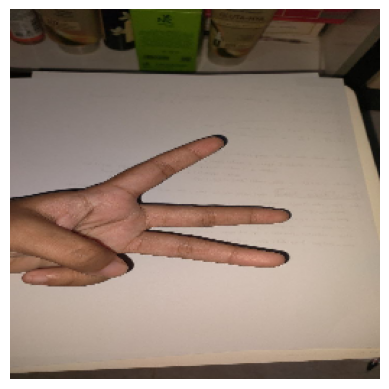

The model predicts that this image is: E
1/1 [==============================] - 0s 54ms/step


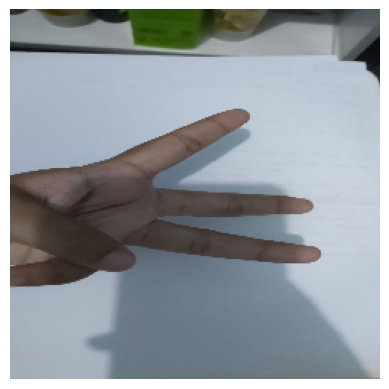

The model predicts that this image is: E
1/1 [==============================] - 0s 50ms/step


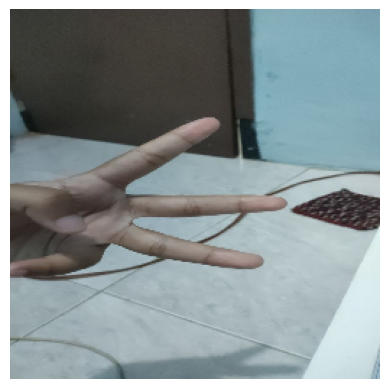

The model predicts that this image is: C


In [27]:
def upload_and_predict(feature_extractor, classifier, label_encoder):
    uploaded = files.upload()

    for fn in uploaded.keys():
        # Load the image
        img_path = fn
        img = load_img(img_path, target_size=(256, 256))
        img_array = img_to_array(img)
        img_array = img_array / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Preprocess the image for VGG16
        img_array = preprocess_input(img_array * 255.0)

        # Extract features using the VGG16 model
        features = feature_extractor.predict(img_array)

        # Flatten the features
        features = features.reshape(features.shape[0], -1)

        # Predict the class
        predictions = classifier.predict(features)
        predicted_label = np.argmax(predictions, axis=1)
        predicted_class = label_encoder.inverse_transform(predicted_label)

        # Display the image
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        print(f'The model predicts that this image is: {predicted_class[0]}')

        # Delete the uploaded image
        os.remove(img_path)

# Create the feature extractor model from the VGG16 base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
feature_extractor = tf.keras.Model(inputs=base_model.input, outputs=base_model.get_layer('block5_conv3').output)

upload_and_predict(feature_extractor, classifier, label_encoder)


In [28]:
model.save('model.v.2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### V1

In [ ]:
!git clone https://github.com/shafidaaaa/Bangkit.git

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import zipfile
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
# Initialize lists to hold images and labels
images = []
labels = []

# Set the image size (height, width)
image_size = (256, 256)

# Load images and labels
for label in os.listdir(image_directory):
    label_path = os.path.join(image_directory, label)
    if os.path.isdir(label_path):
        for image_name in os.listdir(label_path):
            image_path = os.path.join(label_path, image_name)
            image = keras.preprocessing.image.load_img(image_path, target_size=image_size)
            image = keras.preprocessing.image.img_to_array(image)
            images.append(image)
            labels.append(label)

# Convert to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Normalize the images
images = images / 255.0

# Encode labels as integers
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Convert labels to categorical (one-hot encoding)
labels_categorical = keras.utils.to_categorical(labels_encoded)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_categorical, test_size=0.2, random_state=42)


In [ ]:
# Split the dataset into training and testing sets
train_dataset_size = int(0.8 * len(image_dataset))  # 80% for training
test_dataset_size = len(image_dataset) - train_dataset_size  # 20% for testing

train_dataset = image_dataset.take(train_dataset_size)
test_dataset = image_dataset.skip(train_dataset_size)



print(f'Training set size: {len(train_dataset)} batches')
print(f'Test set size: {len(test_dataset)} batches')


In [ ]:

# Define the image data generator for augmentation
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,      # Randomly rotate images by 10 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by 10% of the width
    height_shift_range=0.2, # Randomly shift images vertically by 10% of the height
    shear_range=0.2,        # Shear the image by 10%
    zoom_range=0.2          # Randomly zoom into images by 10%
)

# Fit the data generator on the training data
datagen.fit(X_train)

# Define the model
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(16, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using the data generator
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=15,
                    validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

Epoch 1/15
8/8 [==============================] - 23s 3s/step - loss: 7.6515 - accuracy: 0.0321 - val_loss: 3.4647 - val_accuracy: 0.0476
Epoch 2/15
8/8 [==============================] - 22s 3s/step - loss: 3.2863 - accuracy: 0.0683 - val_loss: 3.2576 - val_accuracy: 0.0476
Epoch 3/15
8/8 [==============================] - 21s 2s/step - loss: 3.2582 - accuracy: 0.0281 - val_loss: 3.2576 - val_accuracy: 0.0476
Epoch 4/15
8/8 [==============================] - 21s 2s/step - loss: 3.2581 - accuracy: 0.0281 - val_loss: 3.2582 - val_accuracy: 0.0476
Epoch 5/15
2/8 [======>.......................] - ETA: 22s - loss: 3.2580 - accuracy: 0.0312    

KeyboardInterrupt: 

***DONT USE THIS BELOW***

GOOGLE DRIVE LINK

In [ ]:
# Install PyDrive
!pip install -U -q PyDrive2

# Import necessary libraries
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# This link should be the shared link from your other Google Drive account
shared_link = 'https://drive.google.com/file/d/11s3hFQiFapReSnRBEAVloiPBWP0BXzSw/view?usp=sharing'

# Extract the file ID from the shared link
file_id = shared_link.split('/d/')[1].split('/')[0]

# Download the file
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('archive.zip')

# Unzip the file
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

# Path to the unzipped data
data_path = 'data/Citra BISINDO/'


In [ ]:
# Initialize lists to hold images and labels
images = []
labels = []

# Set the image size (height, width)
image_size = (256, 256)

# Load images and labels
for label in os.listdir(data_path):
    label_path = os.path.join(data_path, label)
    if os.path.isdir(label_path):
        for image_name in os.listdir(label_path):
            image_path = os.path.join(label_path, image_name)
            image = keras.preprocessing.image.load_img(image_path, target_size=image_size)
            image = keras.preprocessing.image.img_to_array(image)
            images.append(image)
            labels.append(label)

# Convert to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Normalize the images
images = images / 255.0

# Encode labels as integers
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Convert labels to categorical (one-hot encoding)
labels_categorical = keras.utils.to_categorical(labels_encoded)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_categorical, test_size=0.2, random_state=42)



# Define the model
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    keras.layers.MaxPooling2D((2, 2)),
    # keras.layers.Conv2D(16, (3, 3), activation='relu'),
    # keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(16, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    # keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=15,
                    validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')


Epoch 1/15
8/8 [==============================] - 29s 2s/step - loss: 3.6453 - accuracy: 0.0643 - val_loss: 3.1816 - val_accuracy: 0.2222
Epoch 2/15
8/8 [==============================] - 18s 2s/step - loss: 3.0846 - accuracy: 0.2329 - val_loss: 3.0282 - val_accuracy: 0.1905
Epoch 3/15
8/8 [==============================] - 21s 3s/step - loss: 2.5427 - accuracy: 0.4177 - val_loss: 2.4198 - val_accuracy: 0.3651
Epoch 4/15
8/8 [==============================] - 18s 2s/step - loss: 1.8069 - accuracy: 0.5904 - val_loss: 1.8569 - val_accuracy: 0.5714
Epoch 5/15
8/8 [==============================] - 19s 2s/step - loss: 1.1594 - accuracy: 0.7590 - val_loss: 1.2314 - val_accuracy: 0.6984
Epoch 6/15
8/8 [==============================] - 20s 3s/step - loss: 0.7577 - accuracy: 0.8112 - val_loss: 0.9647 - val_accuracy: 0.7460
Epoch 7/15
8/8 [==============================] - 19s 2s/step - loss: 0.4142 - accuracy: 0.9036 - val_loss: 0.8080 - val_accuracy: 0.7937
Epoch 8/15
8/8 [==================

***DONT USE THIS ABOVE***

### **THIS IS FOR PREDICTION USING REAL IMAGE**

2/2 [==============================] - 52s 25s/step


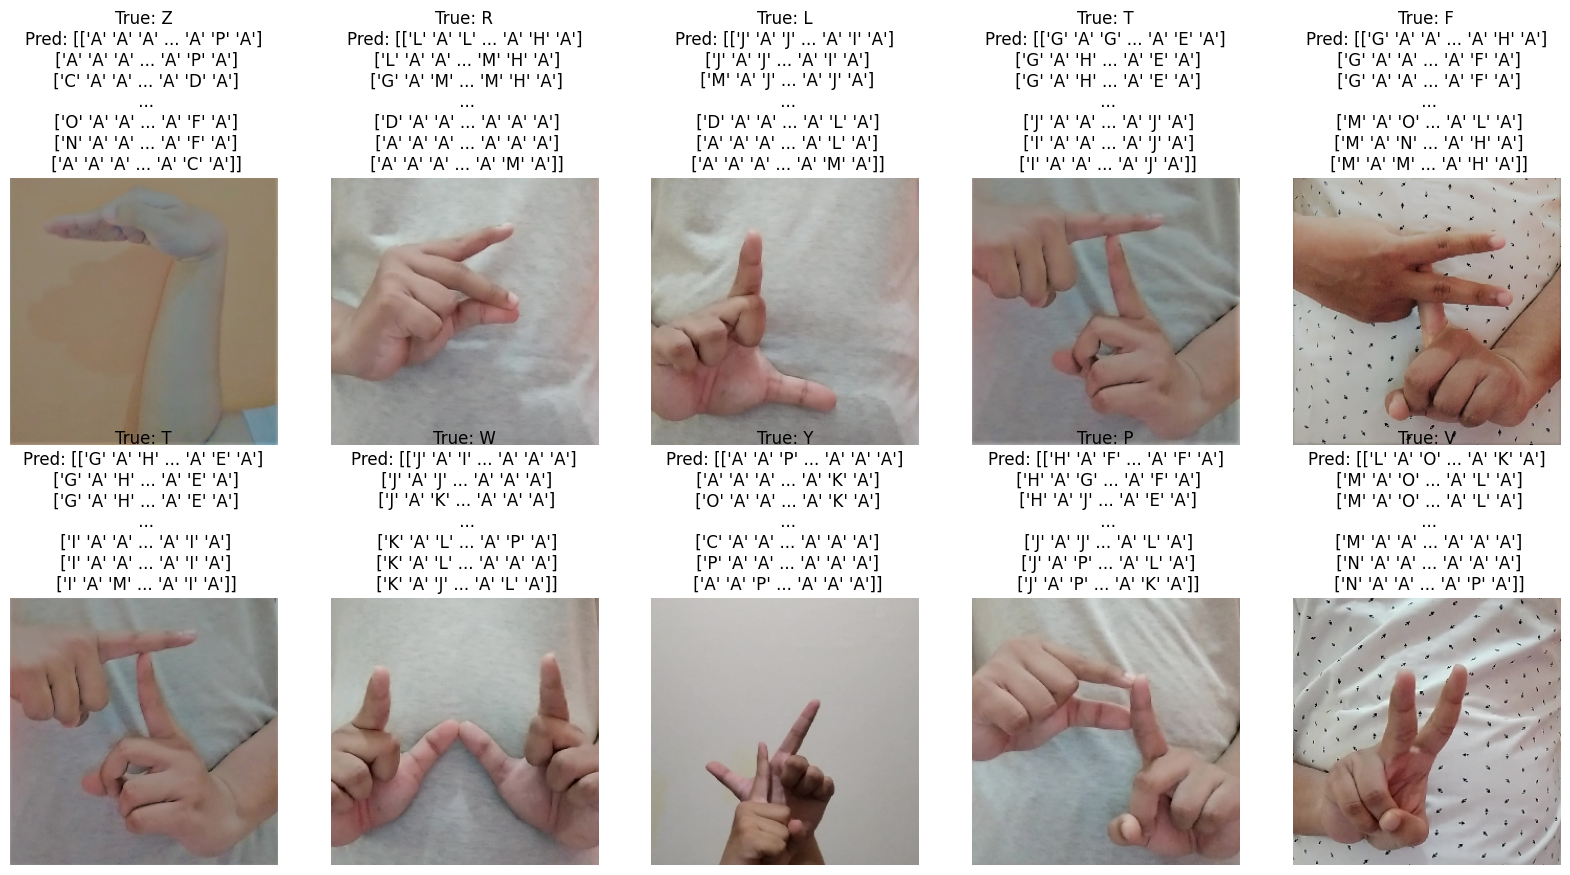

In [ ]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Convert predictions from one-hot encoding to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Convert true labels from one-hot encoding to class labels
true_labels = np.argmax(y_test, axis=1)

# Display the images with their predicted labels
def display_predictions(images, true_labels, predicted_labels, class_names, num_images=10):
    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[predicted_labels[i]]}")
        plt.axis('off')
    plt.show()

# Display the first 10 images and their predictions
display_predictions(X_test, true_labels, predicted_labels, label_encoder.classes_, num_images=10)

Saving test3.jpg to test3 (1).jpg


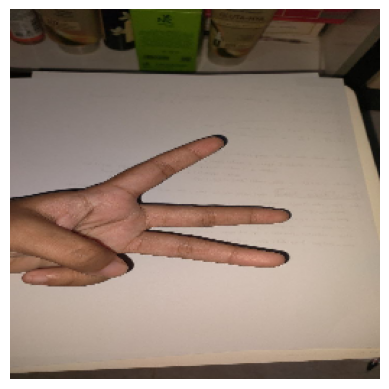

1/1 [==============================] - 1s 698ms/step


ValueError: Found array with dim 3. None expected <= 2.

In [ ]:
# Function to upload and predict an image
def upload_and_predict(model, label_encoder):
    from google.colab import files
    uploaded = files.upload()

    for fn in uploaded.keys():
        # Load the image
        img_path = fn
        img = load_img(img_path, target_size=(256, 256))  # Ensure the image is resized to 64x64
        img_array = img_to_array(img)
        img_array = img_array / 255.0  # Normalize the image
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Display the image
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        # Predict the class
        predictions = model.predict(img_array)
        predicted_label = np.argmax(predictions, axis=1)
        predicted_class = label_encoder.inverse_transform(predicted_label)

        print(f'The model predicts that this image is: {predicted_class[0]}')

        # Delete the uploaded image
        os.remove(img_path)

# Call the function to upload and predict an image
upload_and_predict(model, label_encoder)

***save the model***

In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
